In [ ]:
'''

Objective: Your objective is to train a deep learning model which can
classify the ABO3 perovskite-type oxides into its correct crystal structure.

You need to do the following steps:

(i) Perform the required data pre-processing steps and clean your data.
Essentially, drop unnecessary columns, deal with missing values marked
with ‘-’ without losing essential data, and convert categorical data to
numerical data.

(ii) Split the dataset into training and test data. Further split your training
data into validation data which will help you while tuning your
hyperparameters.

(iii) Build a deep neural network. You will have to decide on how many
layers and how many neurons in each layer you have to keep as these
are hyperparameters. You can also experiment with different activation
functions in each layer. Also, apply Dropout regularisation to your model.

(iv) Train your model on your training dataset using any desired
optimiser and evaluate it first on the training dataset itself. If you are not
getting good accuracy, you should try tuning the hyperparameters
(number of layers and number of neurons in each layer). After you have
got a good accuracy on the training data, evaluate your model on the
validation data. If you again got a bad accuracy, again tune your
hyperparameters and repeat step (iv) until you get a good accuracy on
both training and validation data.

(v) After you have tuned your hyperparameters, you have to experiment
with different optimisers. Train your model using the following optimisers
and evaluate your model on the test data:
(a)Stochastic Gradient Descent
(b)RMSProp
(c)AdaDelta
(d)Adam

(vi) Plot your results obtained (Loss v/s Epoch and Accuracy v/s Epoch)
for each optimiser and write your conclusions separately in the last.

'''

In [5]:
'''correlation_matrix = data.corr()

print(correlation_matrix)'''

                   In literature  r(AXII)(Å)     r(AVI)(Å)  r(BVI)(Å)  \
In literature           1.000000    0.183138  1.571233e-01  -0.132859   
r(AXII)(Å)              0.183138    1.000000  9.374915e-01  -0.005210   
r(AVI)(Å)               0.157123    0.937492  1.000000e+00   0.002976   
r(BVI)(Å)              -0.132859   -0.005210  2.976284e-03   1.000000   
EN(A)                  -0.186487   -0.627417 -6.276035e-01  -0.004038   
EN(B)                   0.047653    0.009343  1.280092e-07  -0.627911   
l(A-O)(Å)               0.112333    0.327965  2.579035e-01  -0.006976   
l(B-O)(Å)              -0.018337   -0.001212 -3.064064e-07   0.280566   
ΔENR                    0.014930   -0.455477 -4.413984e-01  -0.847304   
tG                      0.231562    0.798824  7.454083e-01  -0.591207   
μ                      -0.132841   -0.005205  2.979491e-03   1.000000   
Lowest distortion       0.160572    0.228762  2.282377e-01   0.043298   

                          EN(A)         EN(B)     

<ipython-input-5-033a03d1da52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [10]:
data = pd.read_csv('Crystal_structure.csv')

In [11]:
# (i) preprocessing

data = data.drop(columns=['Compound', 'A', 'B', 'v(A)', 'v(B)', 'l(B-O)(Å)', 'EN(B)', 'l(A-O)(Å)', 'μ', 'τ' ])
data.replace('-', float('nan'), inplace=True)
data.dropna(thresh = 4, inplace = True)

data['Lowest distortion'].dropna(inplace = True)
label_encoder = LabelEncoder()
data['Lowest distortion'] = label_encoder.fit_transform(data['Lowest distortion'])

data.replace(float('nan'), 0, inplace=True)

X = data.drop(columns=['Lowest distortion'])
y = data['Lowest distortion']

X = (X - X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [43]:
# (a)Stochastic Gradient Descent

# building a deep neural network
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(5, activation='softmax')
])

# compiling
model1.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy']) #'categorical_crossentropy'


Epoch 1/4
64/64 - 0s - loss: 0.0949 - accuracy: 0.6625 - val_loss: 0.0927 - val_accuracy: 0.6585 - 234ms/epoch - 4ms/step
Epoch 2/4
64/64 - 0s - loss: 0.0955 - accuracy: 0.6575 - val_loss: 0.0927 - val_accuracy: 0.6595 - 190ms/epoch - 3ms/step
Epoch 3/4
64/64 - 0s - loss: 0.0954 - accuracy: 0.6631 - val_loss: 0.0926 - val_accuracy: 0.6604 - 160ms/epoch - 2ms/step
Epoch 4/4
64/64 - 0s - loss: 0.0950 - accuracy: 0.6659 - val_loss: 0.0926 - val_accuracy: 0.6604 - 194ms/epoch - 3ms/step
34/34 - 0s - loss: 0.0931 - accuracy: 0.6689 - 68ms/epoch - 2ms/step
Test Accuracy: 66.88555479049683 %


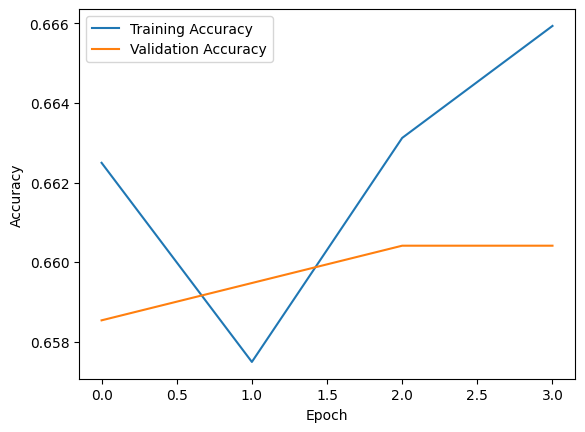

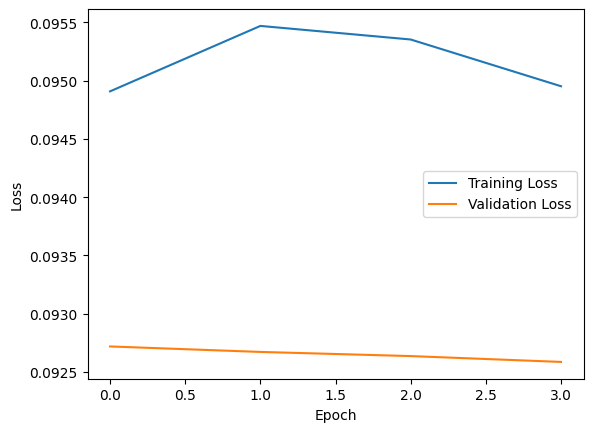

In [53]:
# training
history = model1.fit(X_train, y_train, epochs=4, batch_size=50, validation_data=(X_val, y_val), verbose=2)

# evaluating
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100} %")

# plotting
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [55]:
# (b)RMSProp

# building a deep neural network
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(5, activation='softmax')
])

# compiling
optimizer = RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07)
model2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])


Epoch 1/4
64/64 - 1s - loss: 0.1086 - accuracy: 0.6193 - val_loss: 0.0931 - val_accuracy: 0.6585 - 967ms/epoch - 15ms/step
Epoch 2/4
64/64 - 0s - loss: 0.0950 - accuracy: 0.6609 - val_loss: 0.0911 - val_accuracy: 0.6717 - 215ms/epoch - 3ms/step
Epoch 3/4
64/64 - 0s - loss: 0.0925 - accuracy: 0.6784 - val_loss: 0.0911 - val_accuracy: 0.6811 - 199ms/epoch - 3ms/step
Epoch 4/4
64/64 - 0s - loss: 0.0921 - accuracy: 0.6791 - val_loss: 0.0902 - val_accuracy: 0.6754 - 160ms/epoch - 3ms/step
34/34 - 0s - loss: 0.0921 - accuracy: 0.6726 - 64ms/epoch - 2ms/step
Test Accuracy: 67.26078987121582 %


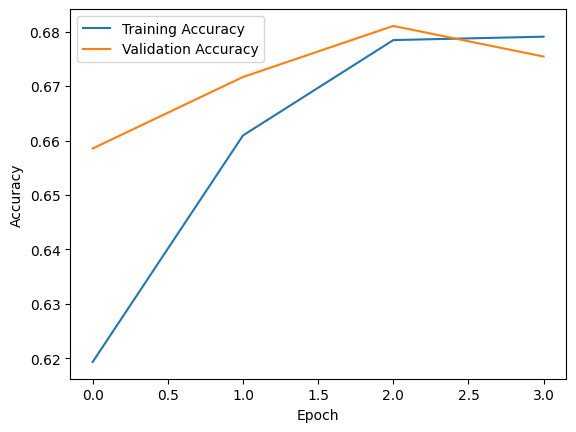

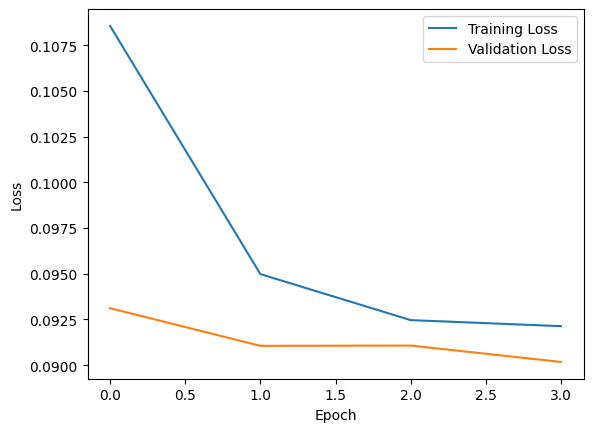

In [56]:
# training
history = model2.fit(X_train, y_train, epochs=4, batch_size=50, validation_data=(X_val, y_val), verbose=2)

# evaluating
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100} %")

# plotting
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [57]:
# (c)AdaDelta

# building a deep neural network
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(5, activation='softmax')
])

# compiling
optimizer = Adadelta(learning_rate=1.0, rho=0.95, epsilon=1e-07)
model3.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])


Epoch 1/4
64/64 - 1s - loss: 0.1191 - accuracy: 0.5796 - val_loss: 0.0971 - val_accuracy: 0.6492 - 1s/epoch - 17ms/step
Epoch 2/4
64/64 - 0s - loss: 0.0978 - accuracy: 0.6606 - val_loss: 0.0920 - val_accuracy: 0.6604 - 232ms/epoch - 4ms/step
Epoch 3/4
64/64 - 0s - loss: 0.0943 - accuracy: 0.6662 - val_loss: 0.0911 - val_accuracy: 0.6595 - 204ms/epoch - 3ms/step
Epoch 4/4
64/64 - 0s - loss: 0.0925 - accuracy: 0.6825 - val_loss: 0.0908 - val_accuracy: 0.6623 - 200ms/epoch - 3ms/step
34/34 - 0s - loss: 0.0912 - accuracy: 0.6707 - 71ms/epoch - 2ms/step
Test Accuracy: 67.07317233085632 %


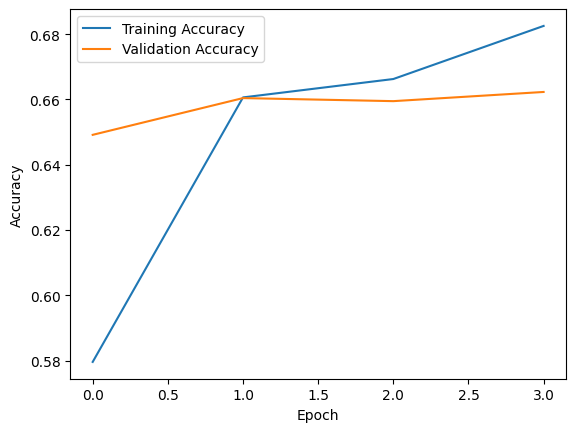

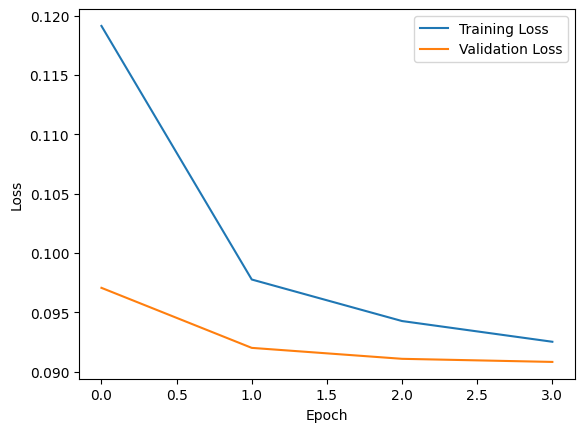

In [58]:
# training
history = model3.fit(X_train, y_train, epochs=4, batch_size=50, validation_data=(X_val, y_val), verbose=2)

# evaluating
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100} %")

# plotting
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [59]:
# (d)Adam

# building a deep neural network
model4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(5, activation='softmax')
])

# compiling
model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


Epoch 1/4
64/64 - 0s - loss: 0.0818 - accuracy: 0.7201 - val_loss: 0.0815 - val_accuracy: 0.7148 - 271ms/epoch - 4ms/step
Epoch 2/4
64/64 - 0s - loss: 0.0820 - accuracy: 0.7138 - val_loss: 0.0812 - val_accuracy: 0.7186 - 173ms/epoch - 3ms/step
Epoch 3/4
64/64 - 0s - loss: 0.0817 - accuracy: 0.7138 - val_loss: 0.0813 - val_accuracy: 0.7083 - 188ms/epoch - 3ms/step
Epoch 4/4
64/64 - 0s - loss: 0.0810 - accuracy: 0.7160 - val_loss: 0.0809 - val_accuracy: 0.7242 - 162ms/epoch - 3ms/step
34/34 - 0s - loss: 0.0822 - accuracy: 0.7083 - 64ms/epoch - 2ms/step
Test Accuracy: 70.82551717758179 %


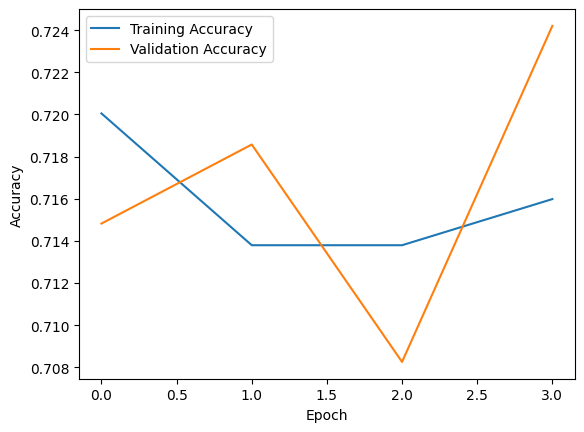

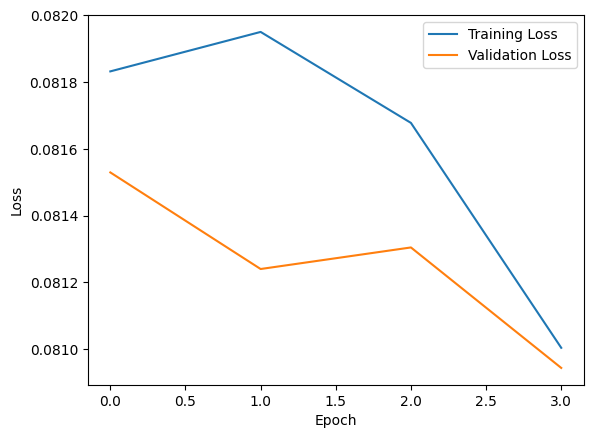

In [63]:
# training
history = model4.fit(X_train, y_train, epochs=4, batch_size=50, validation_data=(X_val, y_val), verbose=2)

# evaluating
test_loss, test_acc = model4.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100} %")

# plotting
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
'''
After experimenting with various batch sizes and epoch numbers,
these are the most optimised models for the optimizers suggested.

'''